In [ ]:
x = 15 + 1.3
  
print(x)

16.3


In [ ]:
x = 40
y = 12
  
add = x + y
sub = x - y
pro = x * y
div = x / y
  
print(add)
print(sub)
print(pro)
print(div)

52
28
480
3.3333333333333335


In [ ]:
a = 13
b = 12.0
  
c = a + int(b)
print(c)

25


In [ ]:
a = 13
b = 5
  
c = a / b
print(c)

2.6


# Desafio generico

# Lectura de informacion

Los datos se encuentran en la siguiente link:
[Data Acciones](https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv)



In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

                       MCD        SBUX  ...          MA        PYPL
formatted_date                          ...                        
2021-01-01      203.187836   95.235695  ...  314.746094  234.309998
2021-02-01      201.525894  106.273232  ...  352.569061  259.850006
2021-03-01      220.471207  107.950699  ...  354.761108  242.839996
2021-04-01      232.215775  113.107674  ...  380.676971  262.290009
2021-05-01      230.061630  112.505043  ...  359.701202  260.019989

[5 rows x 14 columns]


In [ ]:
df.head()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2021-01-01,203.187836,95.235695,1835.739990,3206.199951,230.031799,125.517960,29.089981,56.271671,116.309998,101.389999,65.000000,192.070175,314.746094,234.309998
2021-02-01,201.525894,106.273232,2036.859985,3092.929932,230.448318,144.598679,34.054409,64.472809,148.070007,123.680000,93.269997,211.093323,352.569061,259.850006
2021-03-01,220.471207,107.950699,2068.629883,3094.080078,234.348633,149.570267,37.959236,71.196068,148.110001,120.919998,85.610001,210.764023,354.761108,242.839996
2021-04-01,232.215775,113.107674,2410.120117,3467.419922,250.659698,151.122665,39.961990,69.718323,148.520004,128.699997,86.949997,232.494446,380.676971,262.290009
2021-05-01,230.061630,112.505043,2411.560059,3223.070068,248.174774,162.320847,41.795921,77.564484,143.580002,125.269997,93.269997,226.263016,359.701202,260.019989


Miremos el tamaño de nuestro datraframe

In [ ]:
df.shape

(11, 14)

11 filas x 14 columnas

Las columnas son los precios de acciones de:

1. MCD: Macdonals
2. SBUX: Starbucks
3. GOOG: Google
4. AMZN: Amazon
5. MSFT: Microsoft
6. JPM: JPMorgan Chase & Co.
7. BAC: Bank of America Corp
8. C: Citigroup
9. MAR: Pharma MAr
10. HLT: Hoteles Hilton
11. RCL: Royal Caribbean Cruises
12. V: Visa Inc.
13. MA: Mastercard 
14. PYPL: Paypal

# Parte 1

# Analizando el comportamiento de una serie de tiempo

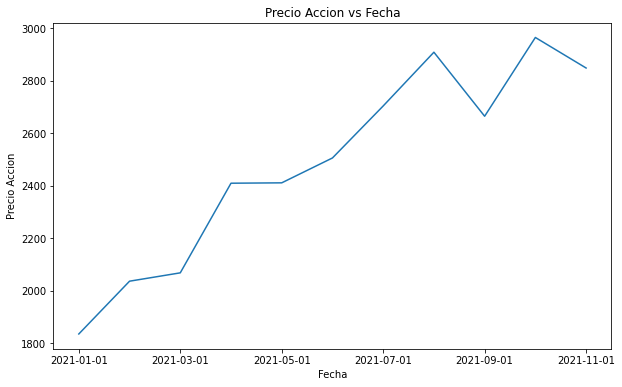

In [ ]:
df['GOOG'].plot(kind='line',figsize=(10,6),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha')

Se observa un comportamiento creciente entre el 01/01/21 hasta el 11/01/2021 

# Extraccion usando indices booleanos

In [ ]:
columnas=list(df.columns)
google= [x for x in columnas if x =='GOOG']
google

In [ ]:
indice_col=list(df.columns=='GOOG')
df_goog=df.loc[:,indice_col]
df_goog # Hemos terminado

,GOOG
formatted_date,
2021-01-01,1835.739990
2021-02-01,2036.859985
2021-03-01,2068.629883
2021-04-01,2410.120117
2021-05-01,2411.560059
2021-06-01,2506.320068
2021-07-01,2704.419922
2021-08-01,2909.239990
2021-09-01,2665.310059


# Grafico interactivo



In [ ]:
df_n= df_goog.copy()
df_n['Fecha']= df_n.index 
df_n= df_n.reset_index(drop=True)
df_n['Fecha']=pd.to_datetime(df_n['Fecha'])
df_n

,GOOG,Fecha
0,1835.739990,2021-01-01
1,2036.859985,2021-02-01
2,2068.629883,2021-03-01
3,2410.120117,2021-04-01
4,2411.560059,2021-05-01
5,2506.320068,2021-06-01
6,2704.419922,2021-07-01
7,2909.239990,2021-08-01
8,2665.310059,2021-09-01
9,2965.409912,2021-10-01


In [ ]:
import plotly.express as px


fig=px.line(data_frame=df_n,x='Fecha',y='GOOG',title='Comportamiento GOOGLE',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

# Parte 2

In [ ]:
df_n

,GOOG,Fecha
0,1835.739990,2021-01-01
1,2036.859985,2021-02-01
2,2068.629883,2021-03-01
3,2410.120117,2021-04-01
4,2411.560059,2021-05-01
5,2506.320068,2021-06-01
6,2704.419922,2021-07-01
7,2909.239990,2021-08-01
8,2665.310059,2021-09-01
9,2965.409912,2021-10-01


In [ ]:
pasos = 2
def my_fun(x):
    return x.iloc[-1] - x.iloc[0]

df_n['Dif']=df_n['GOOG'].rolling(window=pasos).apply(my_fun) # Hacemos la diferencia del valor actual - anterior
df_n

,GOOG,Fecha,Dif
0,1835.739990,2021-01-01,NaN
1,2036.859985,2021-02-01,201.119995
2,2068.629883,2021-03-01,31.769897
3,2410.120117,2021-04-01,341.490234
4,2411.560059,2021-05-01,1.439941
5,2506.320068,2021-06-01,94.760010
6,2704.419922,2021-07-01,198.099854
7,2909.239990,2021-08-01,204.820068
8,2665.310059,2021-09-01,-243.929932
9,2965.409912,2021-10-01,300.099854


In [ ]:
# HAcemos un filtro de cuando los valores de Dif <0
index_bool= df_n.Dif<0
index_bool

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10     True
Name: Dif, dtype: bool

In [ ]:
# Ahora podemos aplicar el filtro sobre el objeto data frame
df_neg=df_n.loc[index_bool,:]
df_neg

,GOOG,Fecha,Dif
8,2665.310059,2021-09-01,-243.929932
10,2849.040039,2021-11-01,-116.369873


Solo existieron dos días donde la accion bajo de precio

# Graficando fechas donde ocurrio la bajada

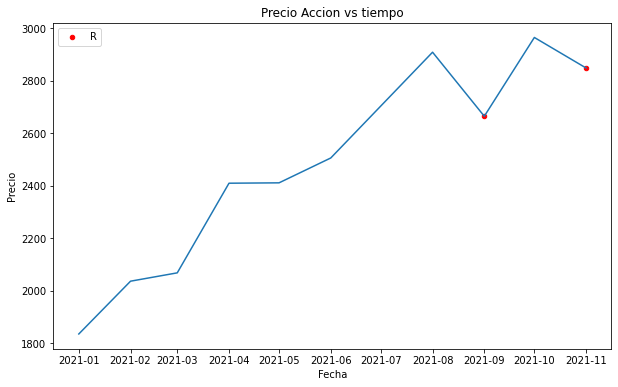

In [ ]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(10,6))
ax.plot(df_n.Fecha,df_n.GOOG)
ax.scatter(x=df_neg.Fecha, y= df_neg.GOOG, s=20, color='red', label='R')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precio Accion vs tiempo')
ax.legend(loc='upper left')

# Desafio

Intenten hacer le mismo procedimiento para AMZN y observen si existe el mismo patron

Con esto entonces podemos monitorear cuando una accion puede disminuir su valor

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>